In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df_internet_baf_total = pd.read_csv('Datasets\Internet_BAF_total.csv')

## Analisis Exploratorio: Internet Banda Ancha/Fija Total

In [69]:
df_internet_baf_total.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [70]:
df_internet_baf_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [71]:
#Contabilizamos los valores nulos
df_internet_baf_total.isnull().sum()

Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64

### Normalizamos

In [72]:
#Reemplazamos "." por ""
df_internet_baf_total['Total'] = df_internet_baf_total['Total'].str.replace(".", "")
#Reemplazamos "." por ""
df_internet_baf_total['Banda ancha fija'] = df_internet_baf_total['Banda ancha fija'].str.replace(".", "")


In [73]:
#Cambiamos de formato str a int
df_internet_baf_total['Total'] = df_internet_baf_total['Total'].astype(int)
df_internet_baf_total['Banda ancha fija'] = df_internet_baf_total['Banda ancha fija'].astype(int)

In [74]:
df_internet_baf_total.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01
mean,2017.885714,2.457143,8.274417e+06,23.383371,8.297800e+06
std,2.564135,1.120474,1.408774e+06,10.087397,1.399611e+06
min,2014.000000,1.000000,6.362108e+06,9.991000,6.398398e+06
25%,2016.000000,1.500000,7.024946e+06,12.436500,7.057455e+06
50%,2018.000000,2.000000,8.083533e+06,26.911000,8.110444e+06
75%,2020.000000,3.000000,9.244537e+06,32.508500,9.260442e+06
max,2022.000000,4.000000,1.107869e+07,39.324000,1.109113e+07


### Tendencia Banda ancha fija por año

In [75]:
box = df_internet_baf_total.groupby('Año')['Banda ancha fija'].sum().reset_index()

<Axes: xlabel='Año'>

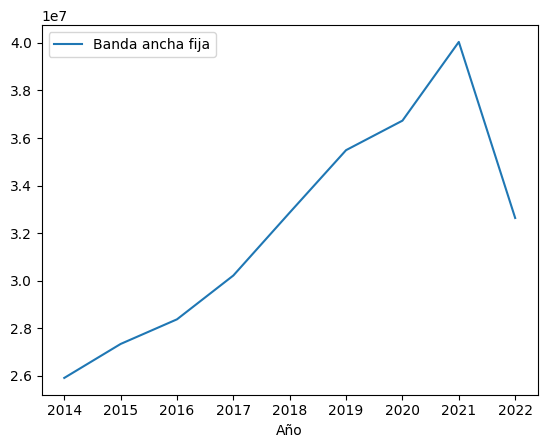

In [76]:
box.plot(kind = "line", x = "Año", y = "Banda ancha fija", alpha = 1)

### Tendencia Banda Corta

In [77]:
box2 = df_internet_baf_total.groupby('Año')['Dial up'].sum().reset_index()

<Axes: xlabel='Año'>

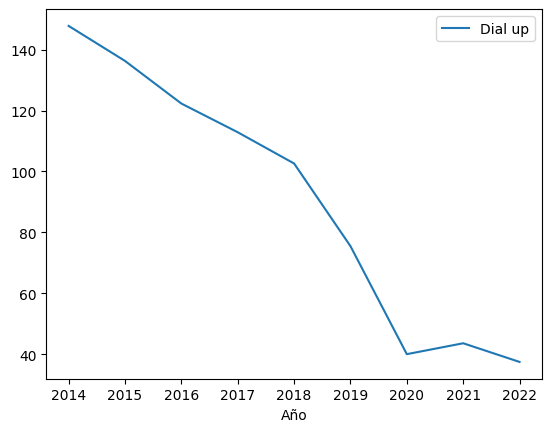

In [78]:
box2.plot(kind = "line", x = "Año", y = "Dial up", alpha = 1)

## Analisis Exploratorio: Historico velocidad Internet


In [79]:
df_historico_velocidad = pd.read_csv('Datasets\historico_velocidad_internet.csv', decimal=',')

In [80]:
df_historico_velocidad.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,62.46,Jul-Sept 2022
1,2022,2,58.44,Abr-Jun 2022
2,2022,1,55.11,Ene-Mar 2022
3,2021,4,52.34,Oct-Dic 2021
4,2021,3,48.46,Jul-Sept 2021


In [81]:
df_historico_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     35 non-null     int64  
 1   Trimestre               35 non-null     int64  
 2   Mbps (Media de bajada)  35 non-null     float64
 3   Trimestre.1             35 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [82]:
df_historico_velocidad.isnull().sum()

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

In [83]:
df_historico_velocidad.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,21.827143
std,2.564135,1.120474,19.230717
min,2014.000000,1.000000,3.620000
25%,2016.000000,1.500000,5.250000
50%,2018.000000,2.000000,13.850000
75%,2020.000000,3.000000,39.495000
max,2022.000000,4.000000,62.460000


In [84]:
#Creamos una columna que contemple los trimestres con sus correspondientes años
df_historico_velocidad['year_trim'] = df_historico_velocidad.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

In [85]:
df_historico_velocidad.head(3)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1,year_trim
0,2022,3,62.46,Jul-Sept 2022,22_3
1,2022,2,58.44,Abr-Jun 2022,22_2
2,2022,1,55.11,Ene-Mar 2022,22_1


#### Cambio en Mbps(Media de bajada) por el tiempo

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x800 with 0 Axes>

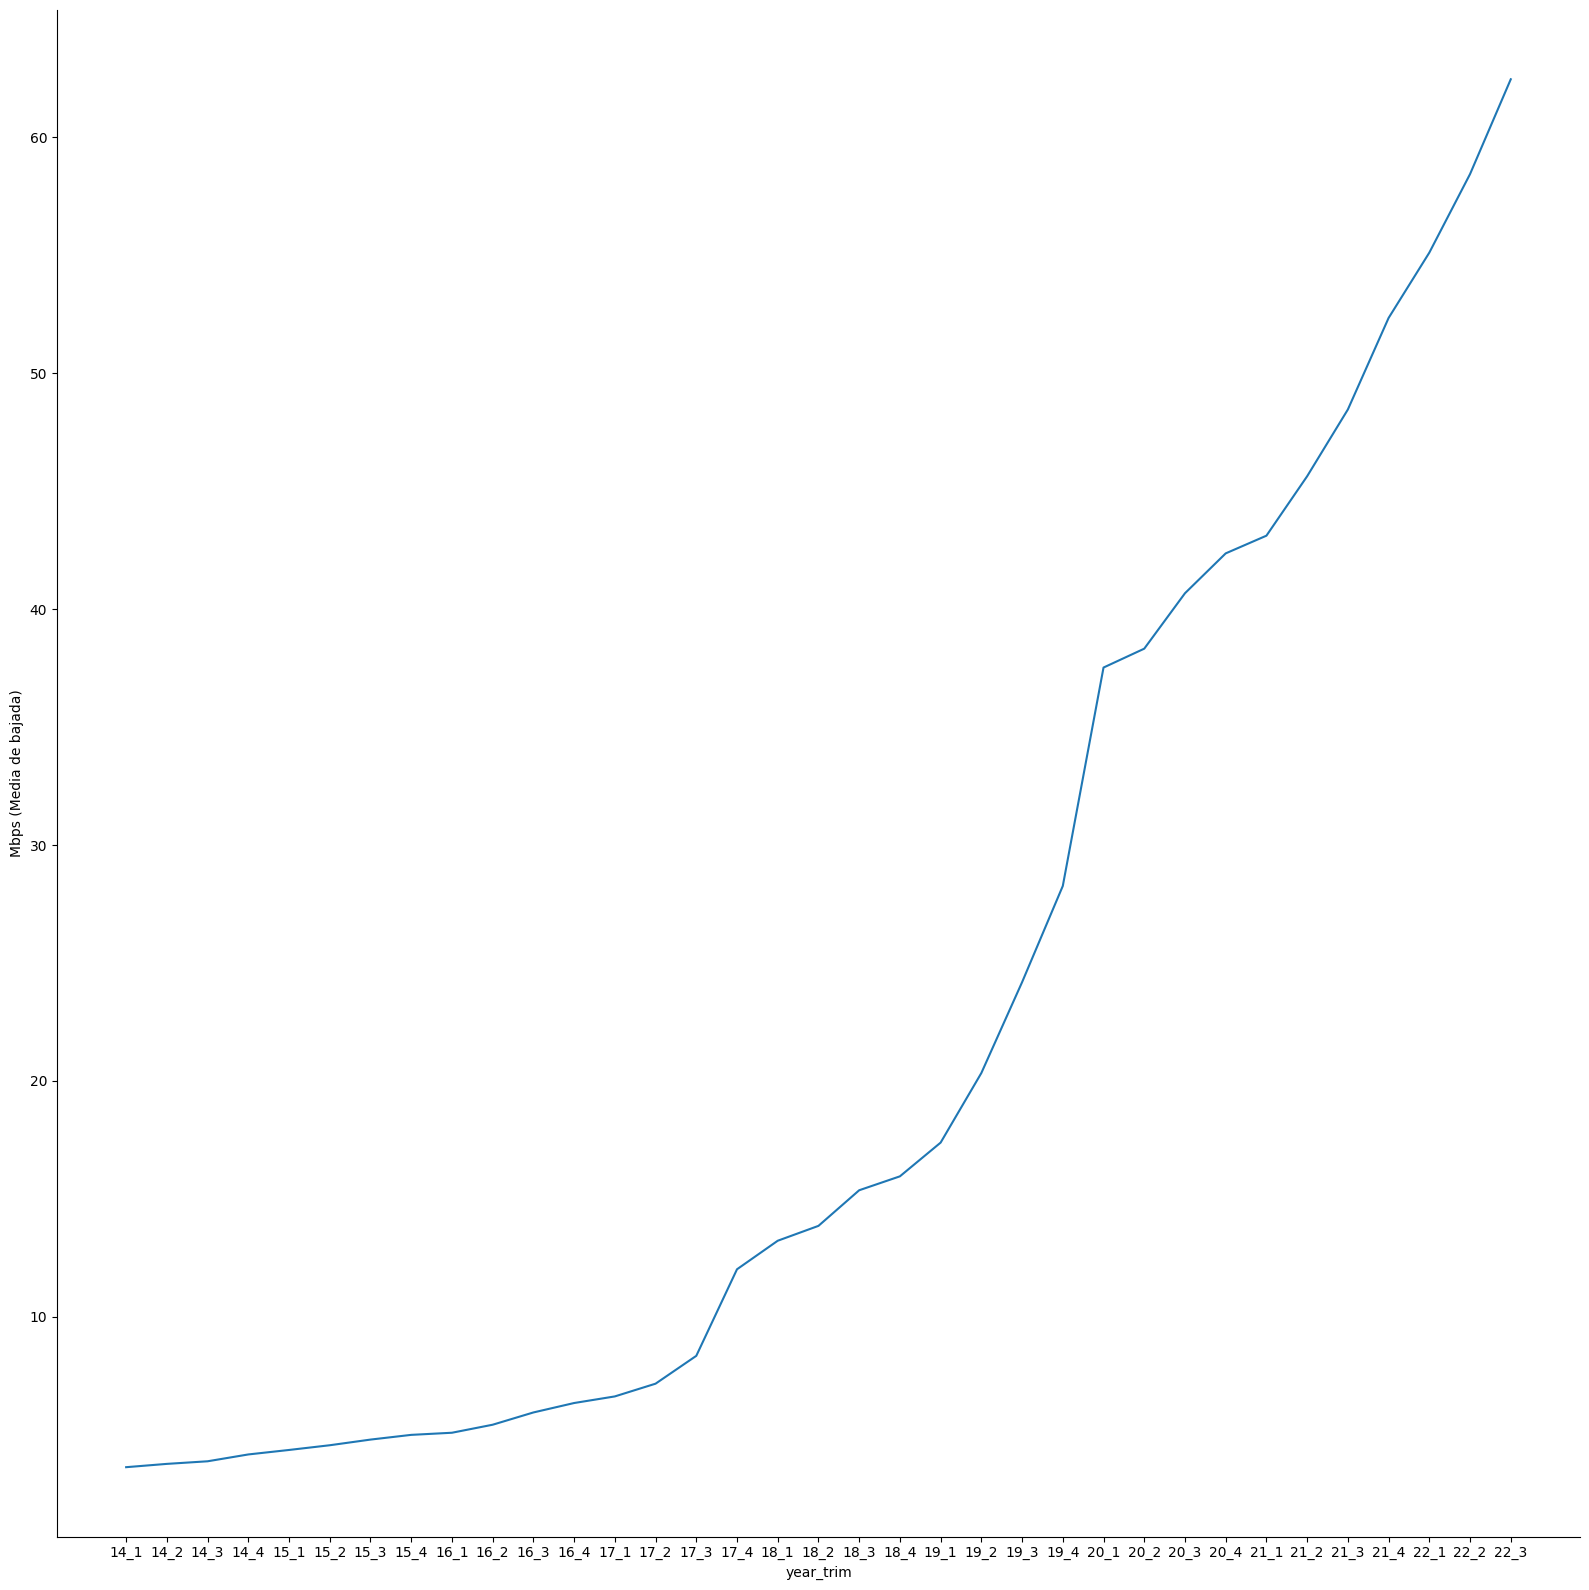

In [133]:
plt.figure(figsize=(18, 8))
sns.relplot(data=df_historico_velocidad.sort_values(by=['Año', 'Trimestre']), x= 'year_trim', y='Mbps (Media de bajada)', height=16, kind='line')

## Analisis Exploratorio: Acceso a Banda ancha y angosta por provincia

In [87]:
df_acc_banda_ancha_angosta = pd.read_csv("Datasets\Internet_Accesos-por-velocidad.csv")

In [88]:
df_acc_banda_ancha_angosta.head(3)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293


In [89]:
df_acc_banda_ancha_angosta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [90]:
#Identificamos si hay nulos
df_acc_banda_ancha_angosta.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [91]:
#Eliminamos valores nulos
df_acc_banda_ancha_angosta['OTROS'].fillna(0,inplace=True)

### Normalizamos las columnas

### 1 a 6 Mbps

In [92]:
df_acc_banda_ancha_angosta["+ 1 Mbps - 6 Mbps"] = df_acc_banda_ancha_angosta["+ 1 Mbps - 6 Mbps"].str.replace(".", "")
df_acc_banda_ancha_angosta["+ 1 Mbps - 6 Mbps"] = df_acc_banda_ancha_angosta["+ 1 Mbps - 6 Mbps"].astype(int)

In [93]:
df_acc_banda_ancha_angosta[df_acc_banda_ancha_angosta['Provincia'] == "Buenos Aires"]["+ 1 Mbps - 6 Mbps"].sum()

54430565

### + 30 Mbps

In [94]:
df_acc_banda_ancha_angosta["+ 30 Mbps"] = df_acc_banda_ancha_angosta["+ 30 Mbps"].str.replace(".", "")
df_acc_banda_ancha_angosta["+ 30 Mbps"] = df_acc_banda_ancha_angosta["+ 30 Mbps"].astype(int)

In [95]:
df_acc_banda_ancha_angosta[df_acc_banda_ancha_angosta['Provincia'] == "Buenos Aires"]["+ 30 Mbps"].sum()

34536860

### Velocidades por provincia

In [96]:
df_rangos = df_acc_banda_ancha_angosta.groupby("Provincia")[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']].sum()

In [97]:
df_rangos

,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS
Provincia,,,,,,,,
Buenos Aires,2273.433,2549.832,54430565,9147.700,11858.528,9509.301,34536860,875.371
Capital Federal,9712.263,4737.856,17296157,4970.908,6470.644,4880.438,14929099,1606.801
Catamarca,1370.000,1445.221,434739,207.249,2793.758,4308.753,308481,54.109
Chaco,8339.000,3678.535,1219517,699.137,1313.120,2671.477,640712,96.501
Chubut,7408.387,1719.220,2493232,2520.450,2109.598,1481.375,59147,137.012
Corrientes,1295.000,5380.834,1365928,738.340,2086.429,3065.516,449085,79.609
Córdoba,4897.084,1161.449,10477261,3245.652,3685.391,1885.223,5792540,204.365
Entre Ríos,1453.625,393.317,3051515,1459.283,1607.734,3091.833,835688,239.579
Formosa,2068.394,2805.186,663494,197.508,1774.846,11861.071,148652,2321.874


### Tomamos 3 Velocidades distintas correspondientes a Buenos Aires para identificar tendencias

In [98]:
df_bs_as = df_acc_banda_ancha_angosta[df_acc_banda_ancha_angosta['Provincia'] == 'Buenos Aires']

In [99]:
df_bs_as.groupby('Año')['HASTA 512 kbps'].sum()

Año
2014      30.952
2015      33.942
2016      30.048
2017      24.007
2018    1128.196
2019     634.690
2020     150.238
2021     149.145
2022      92.215
Name: HASTA 512 kbps, dtype: float64

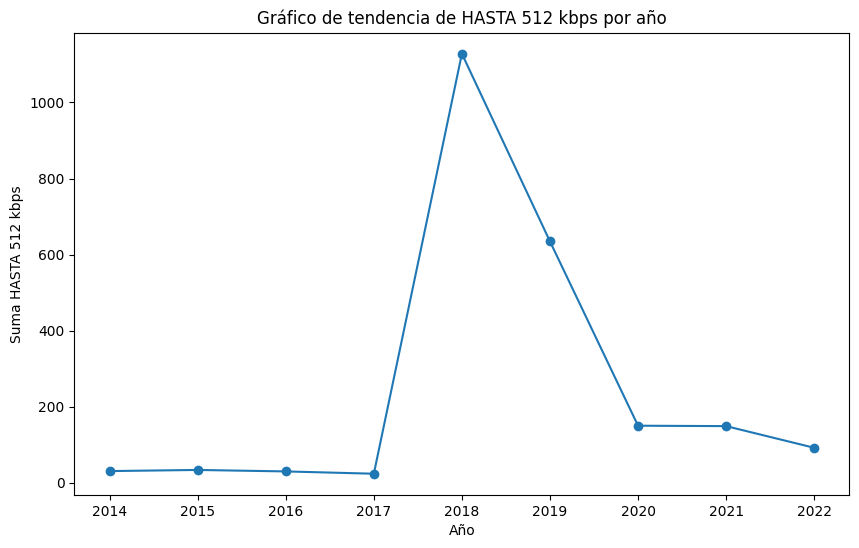

In [100]:
df_tendencia = df_bs_as.groupby('Año')['HASTA 512 kbps'].sum().reset_index()

# Crear el gráfico de tendencia
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_tendencia['Año'], df_tendencia['HASTA 512 kbps'], marker='o')

# Configurar las etiquetas, títulos y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Suma HASTA 512 kbps')
ax.set_title('Gráfico de tendencia de HASTA 512 kbps por año')

# Mostrar el gráfico
plt.show()

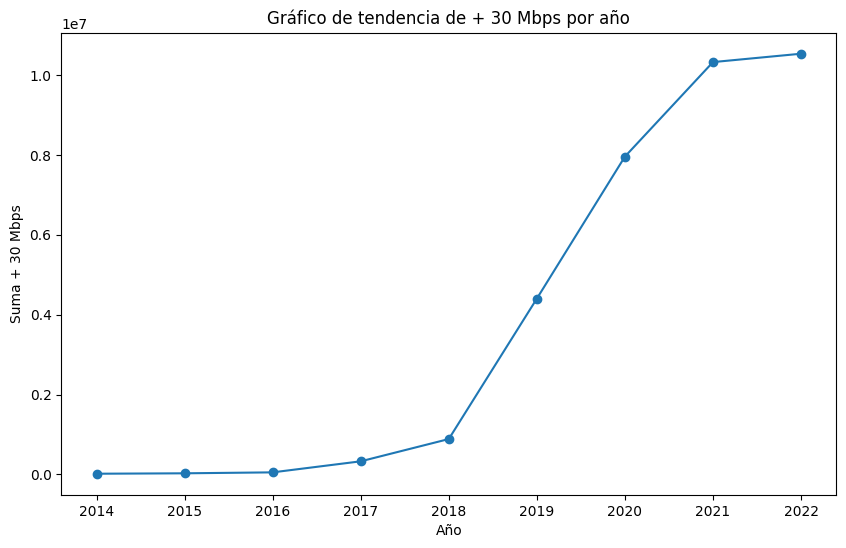

In [101]:
df_tendencia = df_bs_as.groupby('Año')['+ 30 Mbps'].sum().reset_index()

# Crear el gráfico de tendencia
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_tendencia['Año'], df_tendencia['+ 30 Mbps'], marker='o')

# Configurar las etiquetas, títulos y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Suma + 30 Mbps')
ax.set_title('Gráfico de tendencia de + 30 Mbps por año')

# Mostrar el gráfico
plt.show()

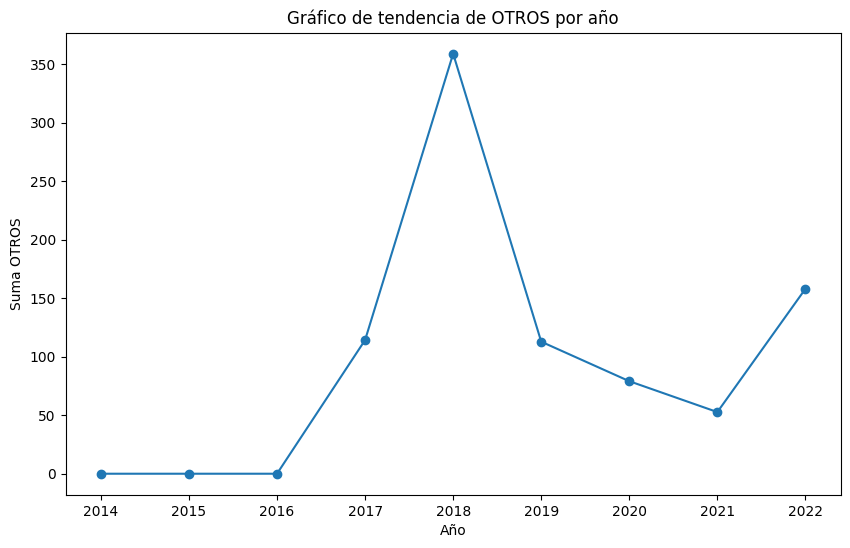

In [102]:
df_tendencia = df_bs_as.groupby('Año')['OTROS'].sum().reset_index()

# Crear el gráfico de tendencia
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_tendencia['Año'], df_tendencia['OTROS'], marker='o')

# Configurar las etiquetas, títulos y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Suma OTROS')
ax.set_title('Gráfico de tendencia de OTROS por año')

# Mostrar el gráfico
plt.show()

### Tendencias de Velocidades en el tiempo tiempo

In [103]:
df_acc_banda_ancha_angosta['year_trim'] = df_acc_banda_ancha_angosta.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

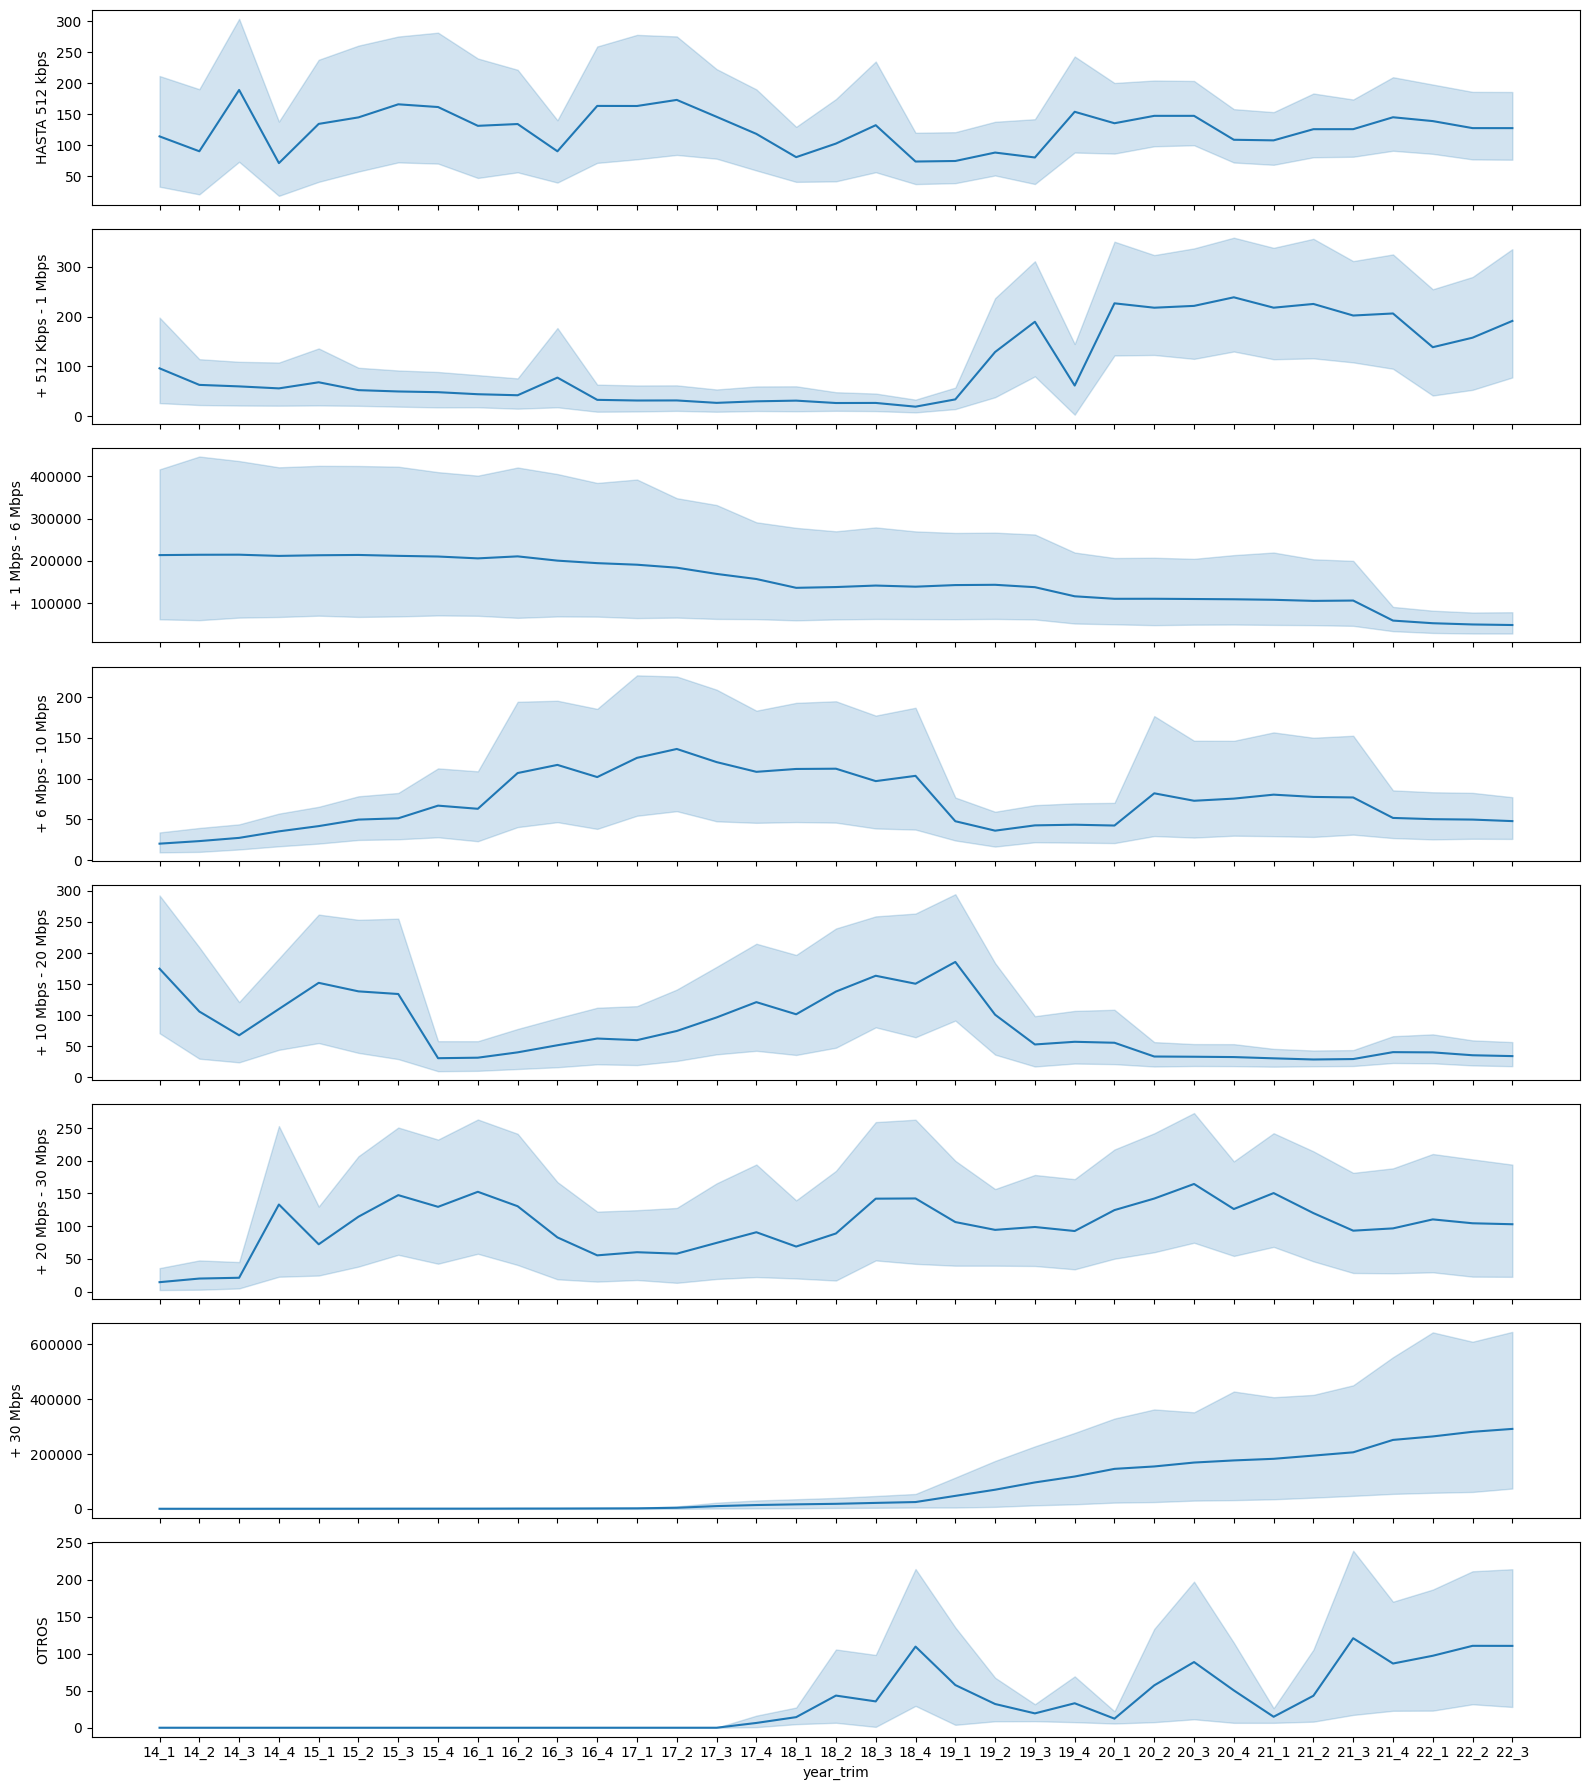

In [104]:
fig, axs = plt.subplots(8, sharex=True, figsize=(16, 18))

sns.lineplot(data=df_acc_banda_ancha_angosta.sort_values(by=['Año', 'Trimestre']), x='year_trim', y='HASTA 512 kbps', ax=axs[0])
sns.lineplot(data=df_acc_banda_ancha_angosta.sort_values(by=['Año', 'Trimestre']), x='year_trim', y='+ 512 Kbps - 1 Mbps', ax=axs[1])
sns.lineplot(data=df_acc_banda_ancha_angosta.sort_values(by=['Año', 'Trimestre']), x='year_trim', y='+ 1 Mbps - 6 Mbps', ax=axs[2])
sns.lineplot(data=df_acc_banda_ancha_angosta.sort_values(by=['Año', 'Trimestre']), x='year_trim', y='+ 6 Mbps - 10 Mbps', ax=axs[3])
sns.lineplot(data=df_acc_banda_ancha_angosta.sort_values(by=['Año', 'Trimestre']), x='year_trim', y='+ 10 Mbps - 20 Mbps', ax=axs[4])
sns.lineplot(data=df_acc_banda_ancha_angosta.sort_values(by=['Año', 'Trimestre']), x='year_trim', y='+ 20 Mbps - 30 Mbps', ax=axs[5])
sns.lineplot(data=df_acc_banda_ancha_angosta.sort_values(by=['Año', 'Trimestre']), x='year_trim', y='+ 30 Mbps', ax=axs[6])
sns.lineplot(data=df_acc_banda_ancha_angosta.sort_values(by=['Año', 'Trimestre']), x='year_trim', y='OTROS', ax=axs[7])

plt.tight_layout()
plt.show()

## Analisis Exploratorio: Penetracion de Internet fijo (accesos por cada 100 hogares)

In [105]:
df_penetracion_int_fijo_100hog = pd.read_csv('Datasets\Internet_Penetracion-por-100-hog_hab.csv', decimal=',')

In [106]:
df_penetracion_int_fijo_100hog.head(3)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,76.64,23.95,Jul-Sept 2022
1,2022,2,75.97,23.72,Abr-Jun 2022
2,2022,1,73.88,23.05,Ene-Mar 2022


In [107]:
df_penetracion_int_fijo_100hog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [108]:
df_penetracion_int_fijo_100hog.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,60.275429,18.606286
std,2.564135,1.120474,8.148909,2.662968
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.500000,52.985000,16.245000
50%,2018.000000,2.000000,59.160000,18.240000
75%,2020.000000,3.000000,66.050000,20.475000
max,2022.000000,4.000000,76.640000,23.950000


In [109]:
df_penetracion_int_fijo_100hog['year_trim'] = df_penetracion_int_fijo_100hog.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

## Acceso por cada 100 hogares en el Tiempo

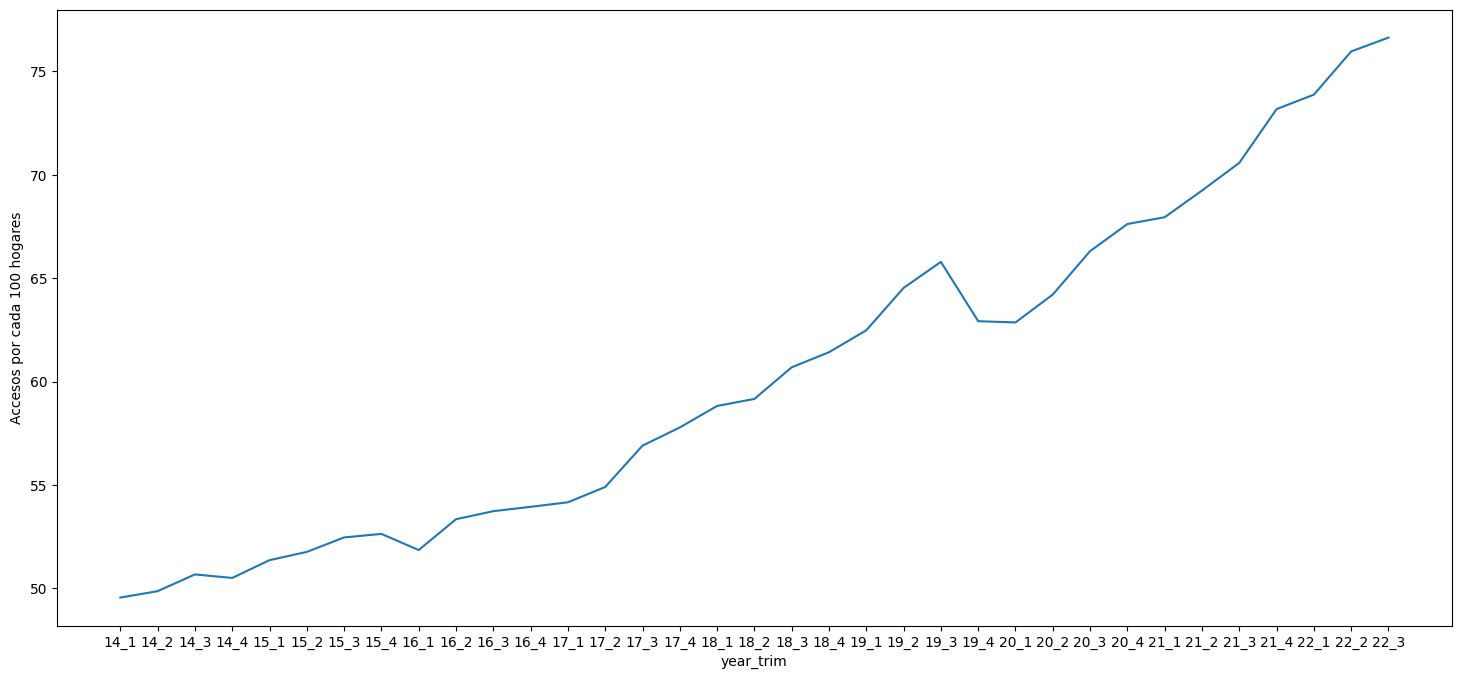

In [110]:
plt.figure(figsize=(18, 8))

sns.lineplot(data=df_penetracion_int_fijo_100hog.sort_values(by=['Año','Trimestre']), x='year_trim', y='Accesos por cada 100 hogares')

plt.show()

## Analisis Exploratorio: Penetracion de internet fijo (accesos cada 100 hogares por provincia)

In [134]:
df_hog_x_prov = pd.read_csv('Datasets\Internet_Penetracion-por-100-hog-provincia.csv', decimal=',')

In [137]:
df_hog_x_prov.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,year_trim
0,2022,3,Buenos Aires,78.11,22_3
1,2022,3,Capital Federal,122.28,22_3
2,2022,3,Catamarca,65.33,22_3


In [135]:
df_hog_x_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [136]:
df_hog_x_prov['year_trim'] = df_hog_x_prov.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

In [138]:
df_hog_x_prov.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


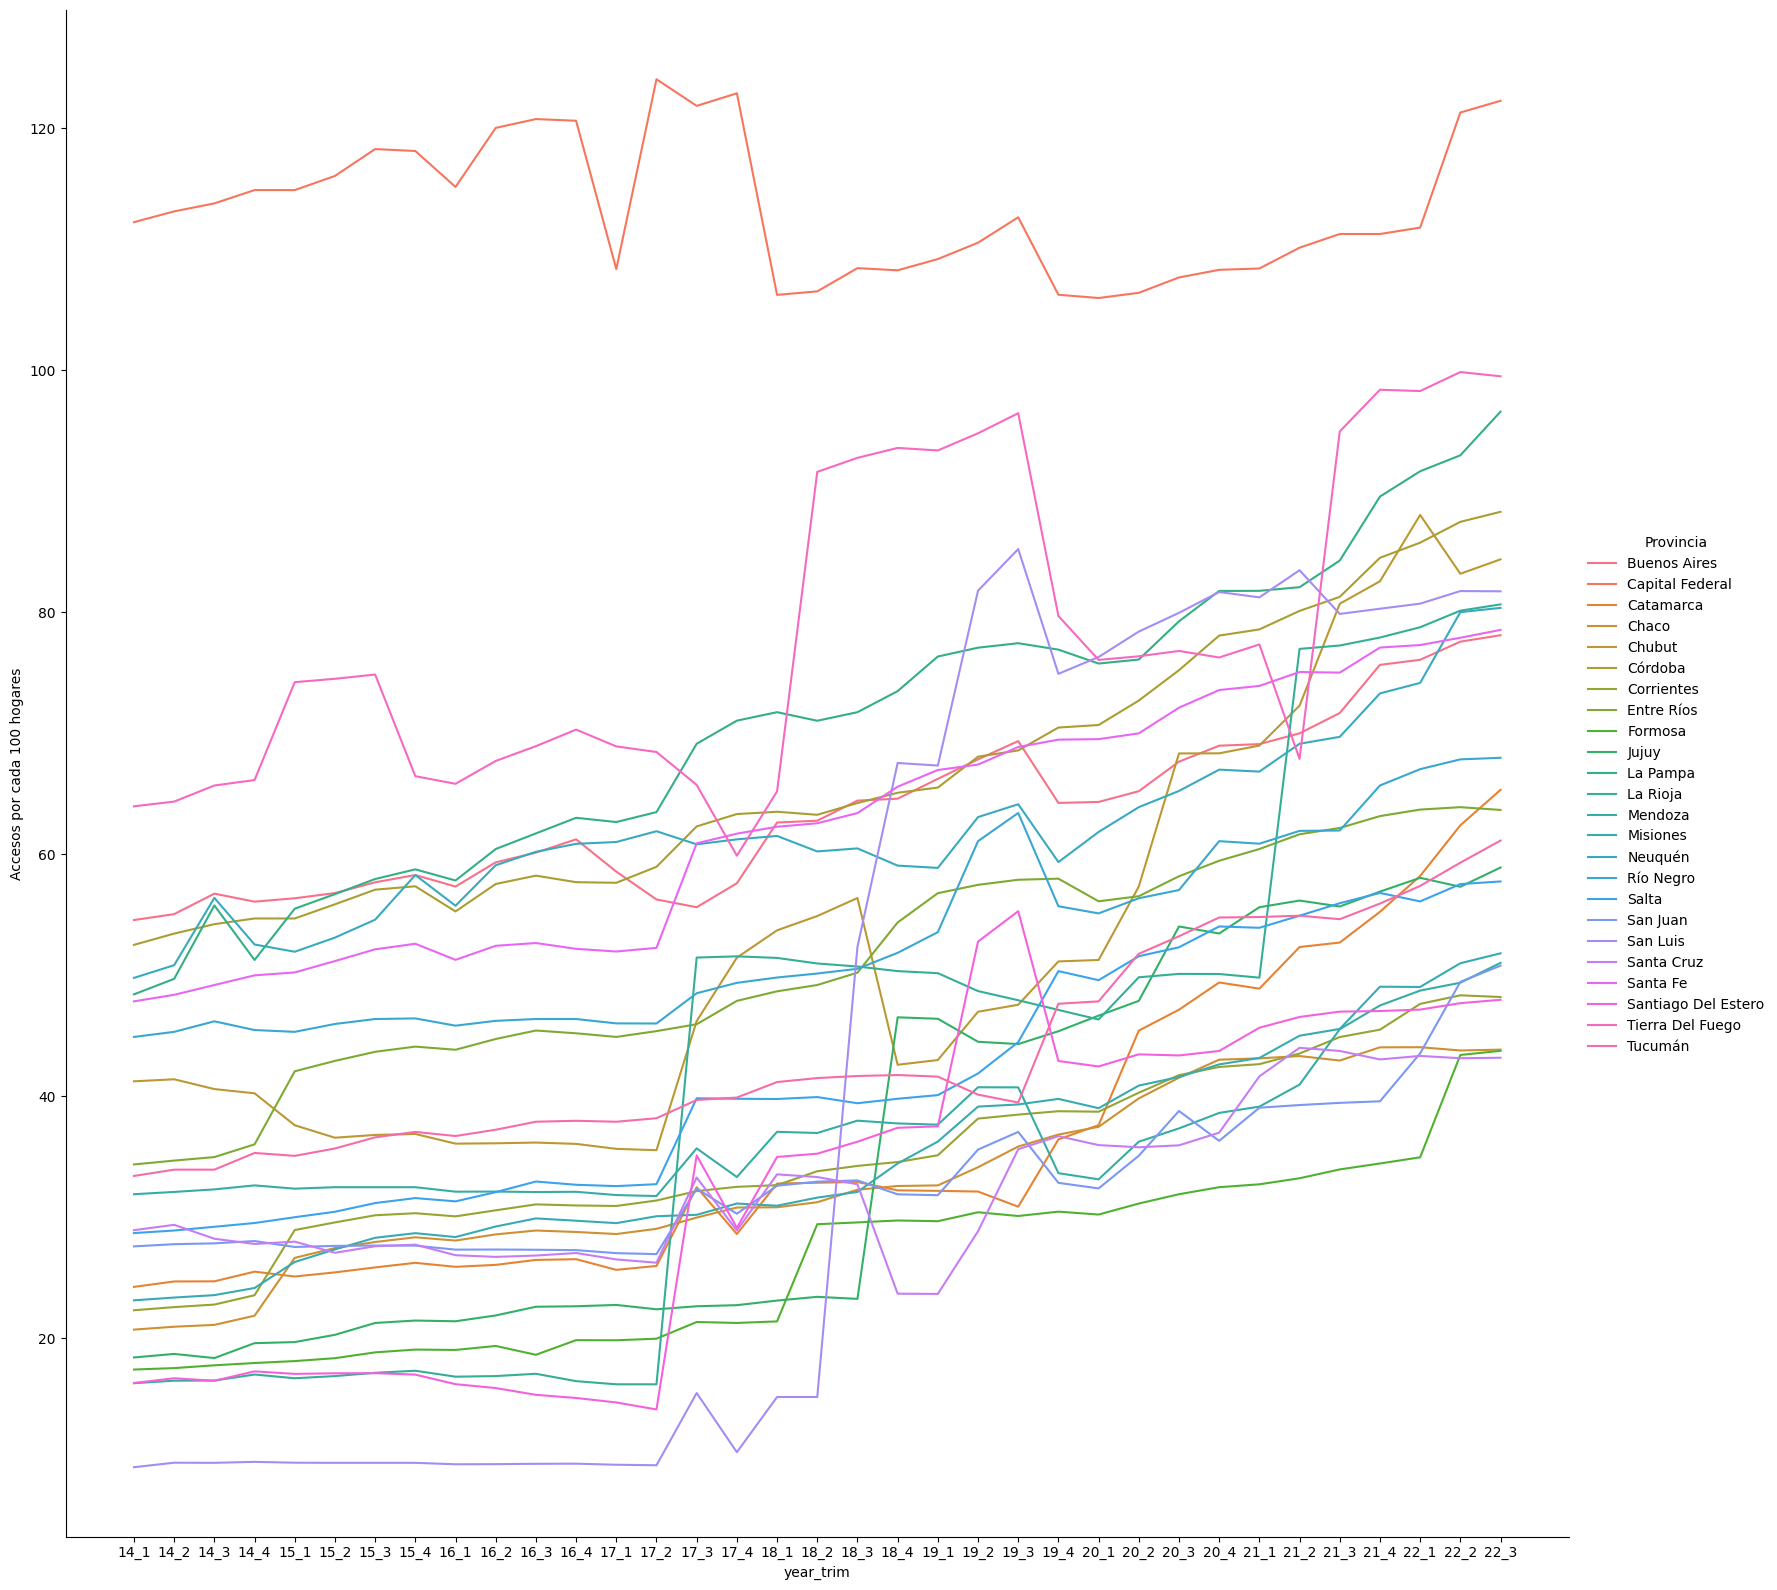

In [139]:
sns.relplot(data=df_hog_x_prov.sort_values(by=['Año', 'Trimestre']), x= 'year_trim', y='Accesos por cada 100 hogares', hue='Provincia', height=16, kind='line')

## Analisis Exploratorio: Tecnologias

In [111]:
df_tecnologias = pd.read_csv('Datasets\Internet_Accesos-por-tecnologia.csv')

In [112]:
df_tecnologias.head(3)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022


In [113]:
df_tecnologias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


### Normalizamos

In [114]:
df_tecnologias['Wireless'] =df_tecnologias['Wireless'].astype(str) 
df_tecnologias['Otros'] = df_tecnologias['Otros'].astype(str)

In [115]:
df_tecnologias['ADSL'] = df_tecnologias['ADSL'].str.replace(".", "")
df_tecnologias['Cablemodem'] = df_tecnologias['Cablemodem'].str.replace(".", "")
df_tecnologias['Fibra óptica'] = df_tecnologias['Fibra óptica'].str.replace(".", "")
df_tecnologias['Total'] = df_tecnologias['Total'].str.replace(".", "")
df_tecnologias['Wireless'] = df_tecnologias['Wireless'].str.replace(".", "")
df_tecnologias['Otros'] = df_tecnologias['Otros'].str.replace(".", "")

In [117]:
#Cambiamos formatos de columnas
df_tecnologias['ADSL'] = df_tecnologias['ADSL'].astype(int)
df_tecnologias['Cablemodem'] = df_tecnologias['Cablemodem'].astype(int)
df_tecnologias['Fibra óptica'] = df_tecnologias['Fibra óptica'].astype(int)
df_tecnologias['Total'] = df_tecnologias['Total'].astype(int)
df_tecnologias['Wireless'] = df_tecnologias['Wireless'].astype(int)
df_tecnologias['Otros'] = df_tecnologias['Otros'].astype(int)

In [ ]:
#Corroboramos
df_tecnologias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int32 
 3   Cablemodem    35 non-null     int32 
 4   Fibra óptica  35 non-null     int32 
 5   Wireless      35 non-null     object
 6   Otros         35 non-null     object
 7   Total         35 non-null     int32 
 8   Periodo       35 non-null     object
dtypes: int32(4), int64(2), object(3)
memory usage: 2.0+ KB


In [118]:
df_tecnologias['year_trim'] = df_tecnologias.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

In [119]:
df_tecnologias.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,3.040425e+06,4.122601e+06,7.390627e+05,224909.857143,123193.828571,8.297800e+06
std,2.564135,1.120474,8.354122e+05,1.225277e+06,7.861772e+05,177544.571827,96972.324891,1.399611e+06
min,2014.000000,1.000000,1.395277e+06,2.407330e+06,1.391870e+05,1653.000000,543.000000,6.398398e+06
25%,2016.000000,1.500000,2.279711e+06,2.966749e+06,1.679880e+05,81766.000000,55934.000000,7.057455e+06
50%,2018.000000,2.000000,3.557216e+06,4.038141e+06,2.262850e+05,155775.000000,71573.000000,8.110444e+06
75%,2020.000000,3.000000,3.723156e+06,5.132233e+06,1.138802e+06,364500.000000,239312.500000,9.260442e+06
max,2022.000000,4.000000,3.803024e+06,6.073426e+06,2.871541e+06,556243.000000,265328.000000,1.109113e+07


<Axes: xlabel='year_trim', ylabel='Otros'>

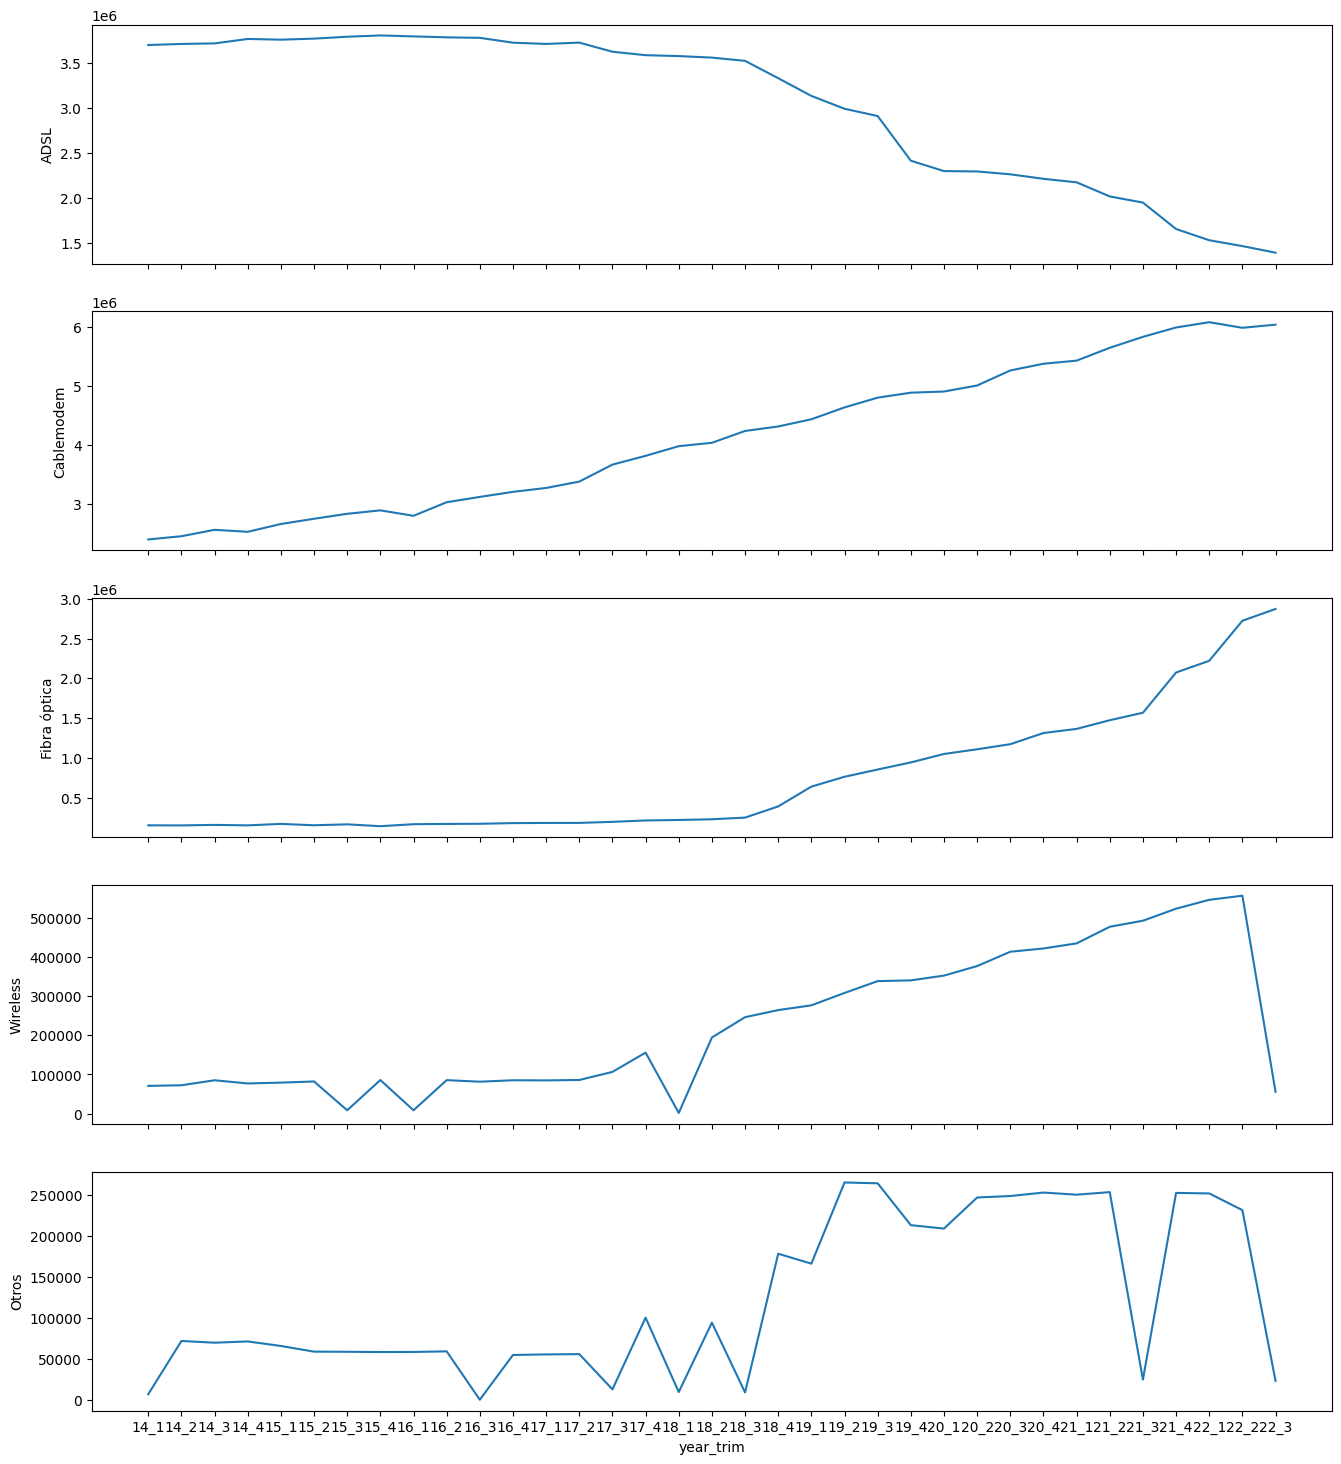

In [120]:
fig, axs = plt.subplots(5, sharex=True, figsize=(16, 18))

sns.lineplot(data=df_tecnologias.sort_values(by=['Año','Trimestre']), x='year_trim', y='ADSL', ax=axs[0])
sns.lineplot(data=df_tecnologias.sort_values(by=['Año','Trimestre']), x='year_trim', y='Cablemodem', ax=axs[1])
sns.lineplot(data=df_tecnologias.sort_values(by=['Año','Trimestre']), x='year_trim', y='Fibra óptica', ax=axs[2])
sns.lineplot(data=df_tecnologias.sort_values(by=['Año','Trimestre']), x='year_trim', y='Wireless', ax=axs[3])
sns.lineplot(data=df_tecnologias.sort_values(by=['Año','Trimestre']), x='year_trim', y='Otros', ax=axs[4])

## Analisis Exploratorio Ingresos 

In [121]:
df_ingresos =pd.read_csv('Datasets\Internet_Ingresos.csv')

In [122]:
df_ingresos.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022


In [123]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


### Normalizamos 

In [124]:
df_ingresos['Ingresos (miles de pesos)']

0     67.055.930
1     60.335.724
2     55.589.997
3     45.467.887
4     42.999.944
5     38.239.667
6     36.676.371
7     33.539.703
8     31.997.445
9     32.102.476
10    29.946.216
11    24.169.251
12    21.652.748
13    20.743.118
14    20.207.414
15    16.637.687
16    15.410.981
17    14.319.467
18    13.171.459
19    11.226.127
20    10.065.998
21     9.678.647
22     8.701.201
23     7.483.980
24     6.912.442
25     6.534.241
26     5.936.845
27     5.376.899
28     5.153.739
29     4.701.791
30     4.876.385
31     3.950.441
32     3.478.638
33     3.270.816
34     2.984.054
Name: Ingresos (miles de pesos), dtype: object

In [125]:
df_ingresos['Ingresos (miles de pesos)'] = df_ingresos['Ingresos (miles de pesos)'].str.replace(".", "")

In [126]:
df_ingresos['Ingresos (miles de pesos)'] = df_ingresos['Ingresos (miles de pesos)'].astype(int)

### Visualizamos la tendencia de ingresos por año

In [127]:
df_ingresos_al_año = df_ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

In [129]:
df_ingresos_al_año

,Año,Ingresos (miles de pesos)
0,2014,13683949
1,2015,20108814
2,2016,26867508
3,2017,39671973
4,2018,59539594
5,2019,86772531
6,2020,127585840
7,2021,163383869
8,2022,182981651


Text(0.5, 1.0, 'Ingresos por miles al año')

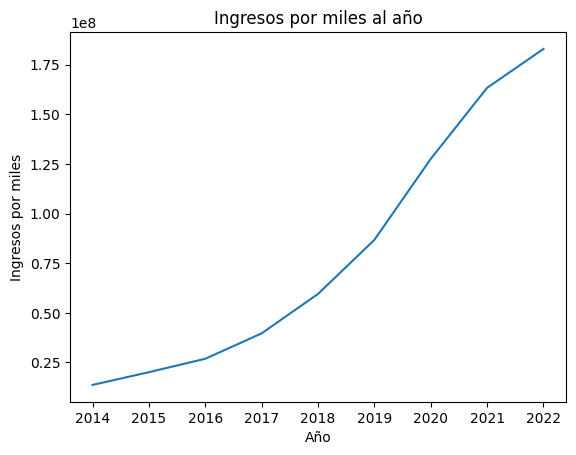

In [130]:
#Creamos el grafico
plt.plot(df_ingresos_al_año['Año'], df_ingresos_al_año['Ingresos (miles de pesos)'])
plt.xlabel('Año')
plt.ylabel('Ingresos por miles')
plt.title('Ingresos por miles al año')